In [1]:
# Retail analysis: Build a Recency Frequency Monetary Model 
# Perform customer segmentation with KMeans Clustering
# Create segments to determine total customer value for the retail outlets

# Credentials - kasham1991@gmail.com / Karan Sharma

In [2]:
# Importing the basic libraries

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(color_codes = True)
sns.set(style = 'white')

In [3]:
# Loading the datasets

train = pd.read_excel('C:/Datasets/retail_train.xlsx')
test = pd.read_excel('C:/Datasets/retail_test.xlsx')

In [4]:
# Looking at the training and test datasets

print("Shape of train data")
print("-------------------")
print(train.shape)
print("-------------------")
print("Columns of train data")
print("---------------------")
print(list(train.columns))
print("-------------------")
print("Types of train columns")
print("----------------------")
print(train.info())
print("-------------------")
print("Shape of test data")
print("-------------------")
print(test.shape)
print("-------------------")
print("Columns of test data")
print("---------------------")
print(list(test.columns))
print("-------------------")
print("Types of test columns")
print("----------------------")
print(test.info())

Shape of train data
-------------------
(379336, 8)
-------------------
Columns of train data
---------------------
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
-------------------
Types of train columns
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379336 non-null  object        
 1   StockCode    379336 non-null  object        
 2   Description  378373 non-null  object        
 3   Quantity     379336 non-null  int64         
 4   InvoiceDate  379336 non-null  datetime64[ns]
 5   UnitPrice    379336 non-null  float64       
 6   CustomerID   285076 non-null  float64       
 7   Country      379336 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.2+ MB
None
--------------

In [5]:
# Basic statiscal analysis
# There are multiple NaN values
# How can quantity and unit price have negative values?

train.describe(include = 'all')
#test.describe(include = 'all')
#train.head(5)
#test.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,379336.0,379336,378373,379336.000000,379336,379336.000000,285076.000000,379336
unique,23857.0,4008,4132,NaN,21712,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,774.0,1611,1649,NaN,774,NaN,NaN,346854
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.517272,NaN,4.681474,15288.302463,NaN
std,NaN,NaN,NaN,259.070548,NaN,105.799352,1712.323663,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13958.750000,NaN


In [6]:
# Looking for missing values aong with NaN
# There is a significant portion of missiong values in the customer id and description
# it is beter to drop them completely
print(train.isnull().sum())
print(test.isnull().sum())

InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94260
Country            0
dtype: int64
InvoiceNo          0
StockCode          0
Description      491
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     40820
Country            0
dtype: int64


In [7]:
# Dropping null values for customer id since it is not an important categorical data
# Since description is discrete, we can use mode to replace the null values

train.dropna(subset = ['CustomerID'], inplace = True)
test.dropna(subset = ['CustomerID'], inplace = True)

train['Description'].fillna(train['Description'].mode()[0], inplace = True)
test['Description'].fillna(test['Description'].mode()[0], inplace = True)

#train.isnull().sum()
#test.isnull().sum()

In [8]:
# Looking for duplicate records
# 2656 duplicate rows/468 duplicate rows

print(train[train.duplicated()])
print(test[test.duplicated()])

       InvoiceNo StockCode                          Description  Quantity  \
2878      575117     21098                CHRISTMAS TOILET ROLL         1   
5729      542107     21755             LOVE BUILDING BLOCK WORD         1   
7615      577778     21733     RED HANGING HEART T-LIGHT HOLDER         1   
8997      578781     22988                    SOLDIERS EGG CUP          1   
14797     575583     20893  HANGING BAUBLE T-LIGHT HOLDER SMALL         1   
...          ...       ...                                  ...       ...   
378899    577773     23507     MINI PLAYING CARDS BUFFALO BILL          1   
379020    571682     23182       TOILET SIGN OCCUPIED OR VACANT         1   
379073    564729     22208             WOOD STAMP SET THANK YOU         2   
379205    538368     22759         SET OF 3 NOTEBOOKS IN PARCEL         1   
379226    578041     22726           ALARM CLOCK BAKELIKE GREEN         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
2878   

In [9]:
# Dropping duplicate rows
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)

#train[train.duplicated()]
#test[test.duplicated()]

Text(0.5, 1.0, 'Dtype type counts in Train set')

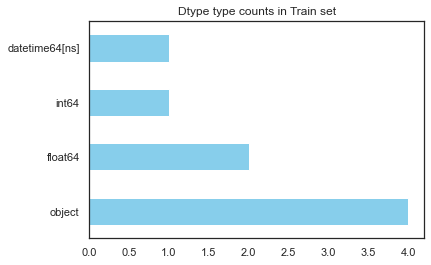

In [10]:
# Exploratory Data Analysis
# Plotting the count of the dtypes

train.dtypes
#test.dtypes

train.dtypes.value_counts().plot(kind = 'barh', color = 'skyblue')
plt.title("Dtype type counts in Train set", fontsize = 12)

Text(0.5, 1.0, 'Dtype counts in Test set')

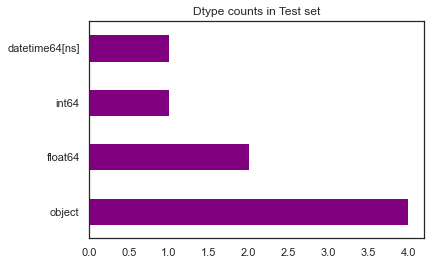

In [11]:
test.dtypes.value_counts().plot(kind = 'barh', color = 'purple')
plt.title("Dtype counts in Test set", fontsize = 12)

Text(0.5, 1.0, 'Boxplot for Train set')

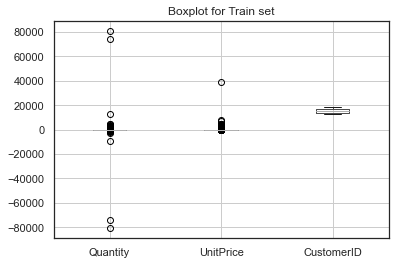

In [12]:
# Looking for outliers with the box plot method
# Quantity and unitprice have a few outliers

train.boxplot()
plt.title("Boxplot for Train set", fontsize = 12)

Text(0.5, 1.0, 'Boxplot for test set')

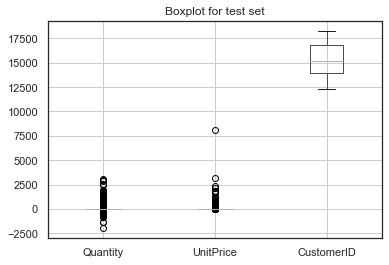

In [13]:
test.boxplot()
plt.title("Boxplot for test set", fontsize = 12)

In [14]:
# Performing cohort analysis
# A cohort is a group of subjects that share a defining characteristic
# Create month cohorts and analyze active customers for each cohort
# Analyze the retention rate of customers

In [15]:
# Creating monthly cohorts on the basis of customer id and invoice date
# Converting cust id to integer from float

train['CustomerID'] = train['CustomerID'].apply(lambda x: int(x))
test['CustomerID'] = test['CustomerID'].apply(lambda x: int(x))

In [16]:
# Looking for unique values in invoice date on the basis of years and months

print(train['InvoiceDate'].nunique())
print(train['InvoiceDate'].dt.year.unique())
print(train['InvoiceDate'].dt.month.unique())

19427
[2011 2010]
[ 6  5  1 12  9 10  2 11  7  8  3  4]


In [17]:
# Using the above to extract string from time
# Looking at the no of unique months 

train['InvoiceMonth'] = train['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))
test['InvoiceMonth'] = test['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))

train['InvoiceMonth'].unique()
#test['InvoiceMonth'].unique()

array(['2011-06', '2011-05', '2011-01', '2010-12', '2011-09', '2011-10',
       '2011-02', '2011-11', '2011-07', '2011-08', '2011-03', '2011-04',
       '2011-12'], dtype=object)

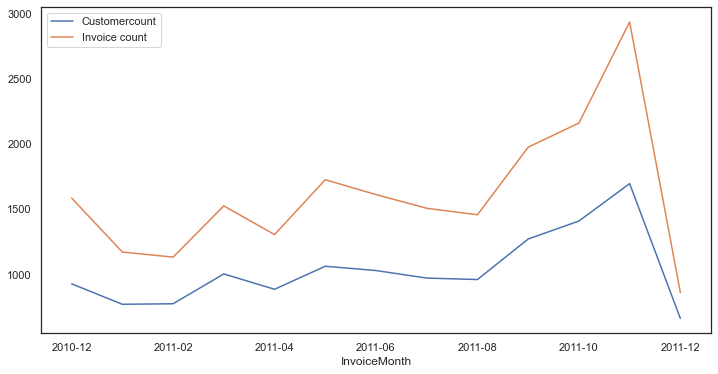

In [18]:
# Plotting the customer count and invoice count across the unique months
# Here we are grouping invoice month on the sum of cust id and invoice no
# We can see that the frequency of the transactions keep increasing over time

count_group = train.groupby('InvoiceMonth').agg({'CustomerID':pd.Series.nunique,
                                        'InvoiceNo':pd.Series.nunique
                                         })
count_group.columns = ['Customercount','Invoice count']
count_group.plot(figsize = (12, 6))

In [19]:
# Analysis of retention rate; how many customers continue to purchase
# Cohort month is the time from which the user starts to purchase from the website
# Lets look at the min cohort month as this becomes the initial month of pruchase
# Grouping cohort month by customer id and invoice month

train['CohortMonth'] = train.groupby('CustomerID')['InvoiceMonth'].transform('min')
test['CohortMonth'] = test.groupby('CustomerID')['InvoiceMonth'].transform('min')

train.head()
#test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126,United Kingdom,2011-06,2011-02
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118,United Kingdom,2011-05,2010-12
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529,United Kingdom,2011-01,2010-12
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448,United Kingdom,2010-12,2010-12
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911,United Kingdom,2011-05,2011-02


In [20]:
# Creating a function for deriving the cohort index 
# It is the difference between the invoice month and cohort month
# It will tell us the time lapse between a specific transaction and the first transaction made by the user; user retention

def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

train['InvoiceMonth'] = pd.to_datetime(train['InvoiceMonth'])
train['CohortMonth'] = pd.to_datetime(train['CohortMonth'])
test['InvoiceMonth'] = pd.to_datetime(test['InvoiceMonth'])
test['CohortMonth'] = pd.to_datetime(test['CohortMonth'])

invoice_year, invoice_month = get_date(train, 'InvoiceMonth')
cohort_year, cohortmonth = get_date(train, 'CohortMonth')
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohortmonth
train['CohortIndex'] = year_diff * 12 + month_diff 


invoice_year, invoice_month = get_date(test, 'InvoiceMonth')
cohort_year, cohortmonth = get_date(test, 'CohortMonth')
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohortmonth
test['CohortIndex'] = year_diff * 12 + month_diff 

train.head()
#test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126,United Kingdom,2011-06-01,2011-02-01,4
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118,United Kingdom,2011-05-01,2010-12-01,5
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529,United Kingdom,2011-01-01,2010-12-01,1
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448,United Kingdom,2010-12-01,2010-12-01,0
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911,United Kingdom,2011-05-01,2011-02-01,3


In [21]:
# Creating a cohort table with index
# Grouping by month, index and id
# Looking at the count

cohort_data = train.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()

cohort_count = cohort_data.pivot_table(index = 'CohortMonth',
                                       columns = 'CohortIndex',
                                       values = 'CustomerID')
cohort_count

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,929.0,350.0,297.0,353.0,332.0,367.0,351.0,322.0,325.0,361.0,344.0,460.0,248.0
2011-01-01,422.0,102.0,120.0,104.0,141.0,122.0,113.0,109.0,132.0,148.0,157.0,66.0,NaN
2011-02-01,377.0,91.0,72.0,101.0,102.0,91.0,95.0,101.0,97.0,117.0,32.0,NaN,NaN
2011-03-01,441.0,81.0,110.0,93.0,101.0,76.0,113.0,103.0,125.0,37.0,NaN,NaN,NaN
2011-04-01,298.0,67.0,65.0,60.0,61.0,71.0,69.0,78.0,23.0,NaN,NaN,NaN,NaN
2011-05-01,278.0,60.0,48.0,48.0,59.0,69.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,238.0,46.0,43.0,62.0,57.0,80.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,192.0,39.0,38.0,45.0,55.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,166.0,38.0,41.0,41.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


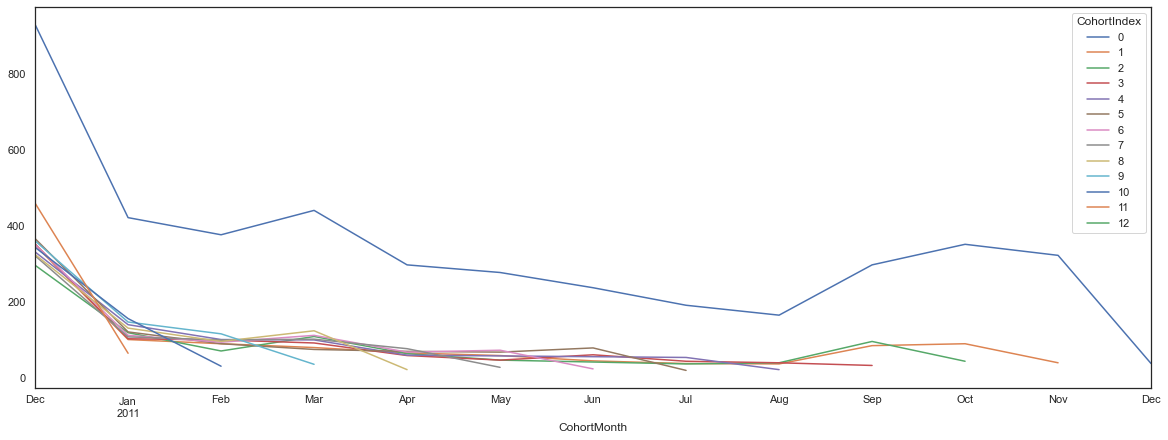

In [22]:
# Plotting the above table
# 248/929 users were purchasing online post 2010-12-01, after that there is a decline in the customer base gradually

cohort_count.plot(figsize = (20, 7))
plt.show()

In [23]:
# As seen from above, the retention rate is low
# Lets plot a heatmap for the same
# Rounding off the float values by 100
cohort_size = cohort_count.iloc[:, 0]
retention = cohort_count.divide(cohort_size, axis = 0)
retention.round(3) * 100

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,37.7,32.0,38.0,35.7,39.5,37.8,34.7,35.0,38.9,37.0,49.5,26.7
2011-01-01,100.0,24.2,28.4,24.6,33.4,28.9,26.8,25.8,31.3,35.1,37.2,15.6,NaN
2011-02-01,100.0,24.1,19.1,26.8,27.1,24.1,25.2,26.8,25.7,31.0,8.5,NaN,NaN
2011-03-01,100.0,18.4,24.9,21.1,22.9,17.2,25.6,23.4,28.3,8.4,NaN,NaN,NaN
2011-04-01,100.0,22.5,21.8,20.1,20.5,23.8,23.2,26.2,7.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,21.6,17.3,17.3,21.2,24.8,26.6,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,19.3,18.1,26.1,23.9,33.6,10.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.3,19.8,23.4,28.6,10.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,22.9,24.7,24.7,13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


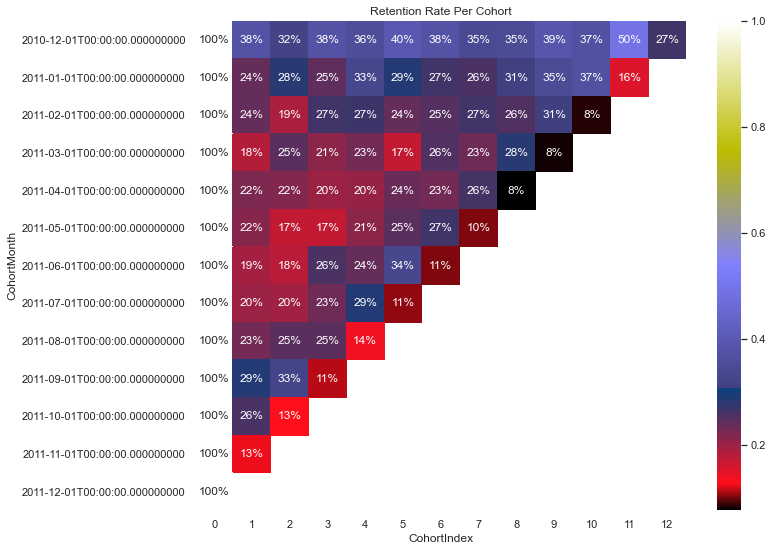

In [24]:
# Using the percentage values since retention is a rate
# 40% is the highest retention rate observed

plt.figure(figsize = (11, 9))
plt.title('Retention Rate Per Cohort')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%',
            cmap = 'gist_stern')
plt.show()

In [25]:
# Calculating the average quantity purchased by cohort
# Grouping by mean quantity; month & index
cohort_data2 = train.groupby(['CohortMonth', 'CohortIndex'])['Quantity'].mean().reset_index()

average_qty = cohort_data2.pivot_table(index = "CohortMonth",
                        columns = "CohortIndex",
                        values = "Quantity").round(1)
average_qty

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,10.7,14.2,14.7,14.2,13.2,14.0,14.5,14.5,16.1,15.7,16.8,12.5,14.5
2011-01-01,10.8,14.3,15.0,10.1,13.1,18.3,15.2,15.8,13.5,11.2,9.6,13.7,NaN
2011-02-01,10.9,11.5,19.5,12.0,10.8,12.2,13.3,12.1,11.1,12.1,14.7,NaN,NaN
2011-03-01,9.5,10.3,12.0,9.2,13.5,11.3,13.5,13.4,9.7,7.5,NaN,NaN,NaN
2011-04-01,9.7,10.1,10.0,11.1,11.1,8.0,10.0,9.4,7.1,NaN,NaN,NaN,NaN
2011-05-01,12.0,9.1,12.7,15.3,11.2,8.5,10.5,7.7,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.3,12.3,10.7,13.5,10.0,9.7,9.6,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.7,12.2,8.4,9.9,7.1,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.0,6.3,5.5,6.2,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


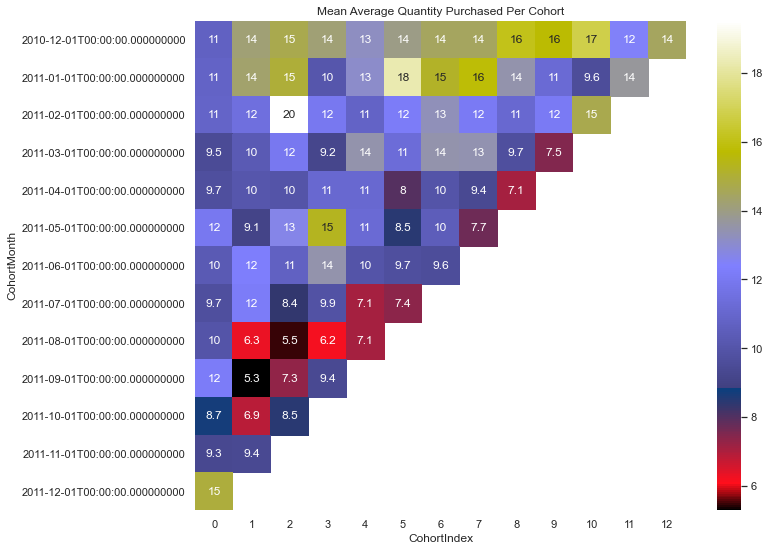

In [26]:
# Plotting the heatmap for the above
plt.figure(figsize = (11,9))
plt.title('Mean Average Quantity Purchased Per Cohort')
sns.heatmap(data = average_qty, 
            annot = True, 
            cmap = "gist_stern")
plt.show()

In [27]:
# Building the Recency Frequency Monetary Parameters 
# Recency means the number of days since a customer made the last purchase
# Frequency is the number of purchase in a given period
# It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period
# Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP

In [28]:
# Calculating the total sales
# Making the relevant columns for RFM
train['Sales'] = train['Quantity'] * train['UnitPrice']
test['Sales'] = test['Quantity'] * test['UnitPrice']

train[['InvoiceNo','InvoiceDate','CustomerID','Sales']].head()

,InvoiceNo,InvoiceDate,CustomerID,Sales
1,556072,2011-06-08 14:57:00,16126,30.00
2,551739,2011-05-04 10:58:00,18118,5.10
3,541658,2011-01-20 12:16:00,15529,0.85
4,538364,2010-12-10 17:26:00,14448,19.50
5,552306,2011-05-08 15:20:00,13911,15.00


In [29]:
# Recency has to claculated from a specific date
# Using the time delta function; difference between two dates

from datetime import timedelta
tym = train['InvoiceDate'].max() + timedelta(days = 1)
tym

Timestamp('2011-12-10 12:50:00')

In [30]:
# Grouping by cust id
# Creating a new table
rfm = train.groupby('CustomerID').agg({
                                        'InvoiceDate' : lambda x: (tym-x.max()).days,
                                         'InvoiceNo'  : lambda x: len(x),
                                         'Sales' : lambda x : sum(x)
                                       })
rfm.rename(columns = {'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Sales': 'MonetaryValue'}, inplace = True)

rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,326,2,0.00
12347,2,132,3124.96
12348,75,20,1009.88
12349,19,50,1344.17
12350,310,11,213.30


In [31]:
# Give recency, frequency, and monetary scores individually by dividing them into quartiles
# Combine three ratings to get a RFM segment (as strings)
# Get the RFM score by adding up the three ratings
# Analyze the RFM segments by summarizing them and comment on the findings

# Rate “recency" for customer who has been active more recently higher than the less recent customer, 
# because each company wants its customers to be recent
# Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money

In [32]:
# Calculating RFM groups,labels and quartiles with the qcut function  

r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(rfm['Recency'], q = 4, labels = r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(rfm['Frequency'], q = 4, labels = f_labels)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(rfm['MonetaryValue'], q = 4, labels = m_labels)

In [33]:
print(r_groups[:5])
print(f_groups[:5])
print(m_groups[:5])

CustomerID
12346    1
12347    4
12348    2
12349    3
12350    1
Name: Recency, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]
CustomerID
12346    1
12347    4
12348    2
12349    3
12350    1
Name: Frequency, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]
CustomerID
12346    1
12347    4
12348    3
12349    4
12350    2
Name: MonetaryValue, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]


In [34]:
# Adding the new columns to original rmf
rfm = rfm.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346,326,2,0.00,1,1,1
12347,2,132,3124.96,4,4,4
12348,75,20,1009.88,2,2,3
12349,19,50,1344.17,3,3,4
12350,310,11,213.30,1,1,2


In [35]:
# Combine three ratings to get a RFM segment (as strings)
rfm['RFM_segment'] = rfm.apply(lambda x: (str(x['R']) + str(x['F']) + str(x['M'])), axis=1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment
CustomerID,,,,,,,
12346,326,2,0.00,1,1,1,111
12347,2,132,3124.96,4,4,4,444
12348,75,20,1009.88,2,2,3,223
12349,19,50,1344.17,3,3,4,334
12350,310,11,213.30,1,1,2,112


In [36]:
# Get the RFM score by adding up the three ratings.
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis = 1)
rfm['RFM_Score'] = rfm['RFM_Score'].apply(lambda x : int(x))
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_Score
CustomerID,,,,,,,,
12346,326,2,0.00,1,1,1,111,3
12347,2,132,3124.96,4,4,4,444,12
12348,75,20,1009.88,2,2,3,223,7
12349,19,50,1344.17,3,3,4,334,10
12350,310,11,213.30,1,1,2,112,4


In [37]:
# No of unique segments
# Looking at the top customers under the RFM segment of 444

print(rfm['RFM_segment'].nunique())
print(rfm['RFM_Score'].unique())
rfm[rfm['RFM_segment'] == '444'].head()

61
[ 3 12  7 10  4 11  6  8  9  5]


,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_Score
CustomerID,,,,,,,,
12347,2,132,3124.96,4,4,4,444,12
12359,8,181,4681.17,4,4,4,444,12
12362,3,183,3463.01,4,4,4,444,12
12388,16,78,2235.13,4,4,4,444,12
12395,16,113,2189.10,4,4,4,444,12


In [38]:
# Creating a function to define rfm_level function on the basis of importance

def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Important'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Good'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Okay'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Neutral'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Might'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Activate'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346,326,2,0.00,1,1,1,111,3,Activate
12347,2,132,3124.96,4,4,4,444,12,Important
12348,75,20,1009.88,2,2,3,223,7,Okay
12349,19,50,1344.17,3,3,4,334,10,Important
12350,310,11,213.30,1,1,2,112,4,Needs Attention


In [39]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)

rfm_level_agg

Recency Frequency MonetaryValue      
                   mean      mean          mean count
RFM_Level                                            
Activate          264.9       5.6          74.0   393
Good               61.5      39.8         670.5   496
Important          25.6     136.6        2901.9  1668
Might             145.3      14.5         233.4   505
Needs Attention   180.3       9.9         156.7   399
Neutral           100.0      20.1         368.7   458
Okay               80.6      27.9         505.9   434

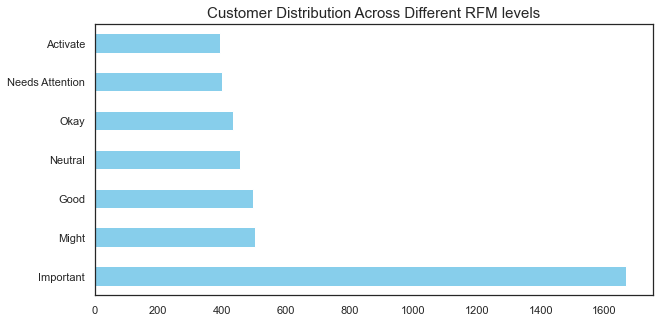

In [40]:
# Plotting the above information
# Most of the customers 1600 plus are in the important RFM_segment

rfm['RFM_Level'].value_counts().plot(kind = 'barh', figsize = (10, 5), color = 'skyblue')
plt.title('Customer Distribution Across Different RFM levels', fontsize = 15)
plt.show()

In [41]:
# Data Modeling with Kmeans Clustering
# Standardize the retail data

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [42]:
cols = ['CustomerID','Sales']
x_train = train[cols]

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)

In [43]:
# Looking for the optimum no of clusters/cluster sum of squares (WCSS)
# Sum of squared distances of samples to their closest cluster centre

wcss = []

for i in range(1, 12):
    
    kmeans = KMeans(n_clusters = i, 
                    init       = 'k-means++', 
                    max_iter   = 300, 
                    n_init     = 10, 
                    random_state = 0)
    
    kmeans.fit(x_train_scaled)
    
    wcss.append(kmeans.inertia_)

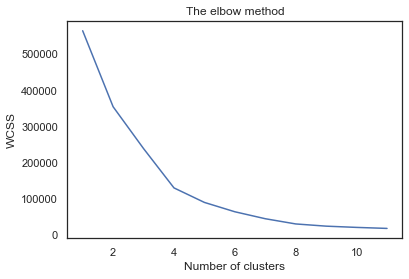

In [44]:
# Plotting the results into a line graph 
# Creating an elbow chart
# WCSS - Within cluster sum of squares
# Optimum no of clusters is 4 as per the elbow in the plot

plt.plot(range(1, 12), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

C:\Users\asus_pc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


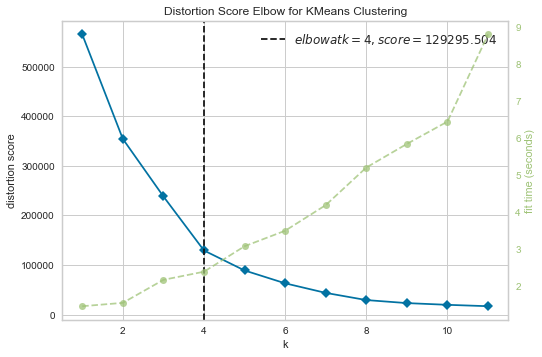

In [45]:
# Fitting the data to the graph
# Yellowbrick is a suite of visual analysis and diagnostic tools designed to facilitate machine learning with scikit-learn

from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k = (1, 12))
visualizer.fit(x_train_scaled)    
visualizer.show()   
#visualizer.poof()   

In [46]:
# Repeating the above steps for test data

x_test = test[cols]
x_test_scaled = sc.fit_transform(x_test)

In [47]:
# Applying kmeans

kmeans = KMeans(n_clusters = 4,  # optimum cluster
                    init       = 'k-means++', 
                    max_iter   = 300, 
                    n_init     = 10, 
                    random_state = 0)

y_pred = kmeans.fit_predict(x_test_scaled)

In [48]:
# Creating a new cloumn for y_pred
# Making predictions on the training set

test['Cluster'] = y_pred
y_pred_train = kmeans.fit_predict(x_train_scaled)
train['Cluster'] = y_pred_train
#train

In [49]:
# No of Clusters along with the no of customers in it
# We were able to build a model that can classify new customers into "low value" , "middle value" and "high value" groups

test['Cluster'].unique()
test['Cluster'].value_counts()

2    64572
1    55959
0      708
3       46
Name: Cluster, dtype: int64

In [50]:
# Thank You :)